In [ ]:
import os
import librosa
import pandas as pd
import numpy as np

excel_filepath = 'output.xlsx'
header = ['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
          'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var',
          'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
          'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var',
          'tempo','spectral_contrast_mean', 'spectral_contrast_var', 'tonnetz_mean', 'tonnetz_var', 'tempogram_mean', 'tempogram_var', 
          'chroma_cens_mean', 'chroma_cens_var', 'mfcc_delta1_mean', 'mfcc_delta1_var', 'mfcc_delta2_mean', 'mfcc_delta2_var', 
          'mfcc_delta3_mean', 'mfcc_delta3_var', 'mfcc_delta4_mean', 'mfcc_delta4_var', 'mfcc_delta5_mean', 'mfcc_delta5_var',
          'chroma_energy_mean', 'chroma_energy_var',
          'spectral_flatness_mean', 'spectral_flatness_var', 'tonnetz_mean',
          'tonnetz_var']+ [f'mfcc{i}_mean' for i in range(1, 21)] + [f'mfcc{i}_var' for i in range(1, 21)] + ['label']

data = []
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

for g in genres:
    for filename in os.listdir(f'genres_original/{g}'):
        songname = f'genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)

        # Split the audio into 3-second intervals
        for i in range(0, len(y), sr * 3):
            segment = y[i:i + sr * 3]

            # Extract features for each 3-second interval
            length = librosa.get_duration(y=segment, sr=sr)
            chroma_stft = librosa.feature.chroma_stft(y=segment, sr=sr)
            rms = librosa.feature.rms(y=segment)
            spectral_centroid = librosa.feature.spectral_centroid(y=segment, sr=sr)
            spectral_bandwidth = librosa.feature.spectral_bandwidth(y=segment, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=segment, sr=sr)
            zero_crossing_rate = librosa.feature.zero_crossing_rate(segment)
            harmony, perceptr = librosa.effects.hpss(segment)
            tempo, _ = librosa.beat.beat_track(y=segment, sr=sr)
            mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=20)
            
            # Additional features
            spectral_contrast = librosa.feature.spectral_contrast(y=segment, sr=sr)
            tonnetz = librosa.feature.tonnetz(y=segment, sr=sr)
            tempogram = librosa.feature.tempogram(y=segment, sr=sr)
            chroma_cens = librosa.feature.chroma_cens(y=segment, sr=sr)
            mfcc_delta1 = librosa.feature.delta(mfcc, order=1)
            mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
            mfcc_delta3 = librosa.feature.delta(mfcc, order=3)
            mfcc_delta4 = librosa.feature.delta(mfcc, order=4)
            mfcc_delta5 = librosa.feature.delta(mfcc, order=5)
            chroma_energy = librosa.feature.chroma_energy(y=segment, sr=sr)
            spectral_flatness = librosa.feature.spectral_flatness(y=segment)
            
            # Calculate means and variances
            features = [filename, length]
            for feature_set in [chroma_stft, rms, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate, 
                                harmony, perceptr, spectral_contrast, tonnetz, tempogram, chroma_cens, mfcc_delta1, 
                                mfcc_delta2, mfcc_delta3, mfcc_delta4, mfcc_delta5, chroma_energy, spectral_flatness]:
                features.extend([np.mean(feature_set), np.var(feature_set)])

            features.append(tempo)
            for i in mfcc:  # Iterate over the 20 MFCC coefficients
                features.extend([np.mean(i), np.var(i)])
            features.append(g)
            data.append(features)


header = ['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
          'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var',
          'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
          'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var'
          ,'spectral_contrast_mean', 'spectral_contrast_var', 'tonnetz_mean', 'tonnetz_var', 'tempogram_mean', 'tempogram_var', 
          'chroma_cens_mean', 'chroma_cens_var', 'mfcc_delta1_mean', 'mfcc_delta1_var', 'mfcc_delta2_mean', 'mfcc_delta2_var', 
          'mfcc_delta3_mean', 'mfcc_delta3_var', 'mfcc_delta4_mean', 'mfcc_delta4_var', 'mfcc_delta5_mean', 'mfcc_delta5_var',
          'chroma_energy_mean', 'chroma_energy_var',
          'spectral_flatness_mean', 'spectral_flatness_var','tempo']+ [f'mfcc{i}_mean' for i in range(1, 21)] + [f'mfcc{i}_var' for i in range(1, 21)] + ['label']



# Create a DataFrame from the data
df = pd.DataFrame(data, columns=header)

# Write the DataFrame to an Excel file
df.to_excel(excel_filepath, index=False)

In [41]:
import os
import librosa
import pandas as pd
import numpy as np

ses = "C:\\Users\\ahmet\\Downloads\\archive (2)\\Data\\genres_original\\metal\\metal.00086.wav"
ses2 = "C:\\Users\\ahmet\\Downloads\\archive (2)\\Data\\genres_original\\classical\\classical.00084.wav"
ses3 = "C:\\Users\\ahmet\\Downloads\\archive (2)\\Data\\genres_original\\pop\\pop.00084.wav"
x,sr = librosa.load(ses)
x2,sr2 = librosa.load(ses2)
x3,sr2 = librosa.load(ses3)

In [2]:
print(x.shape,sr)

(661504,) 22050


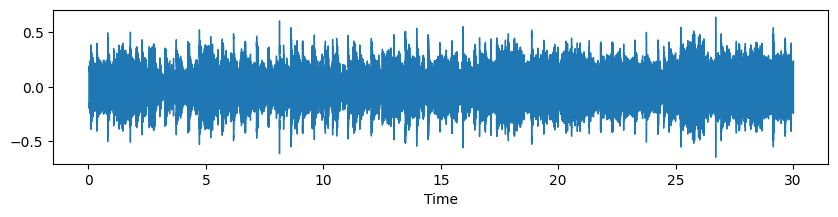

In [4]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10,2))
librosa.display.waveshow(x,sr=sr)

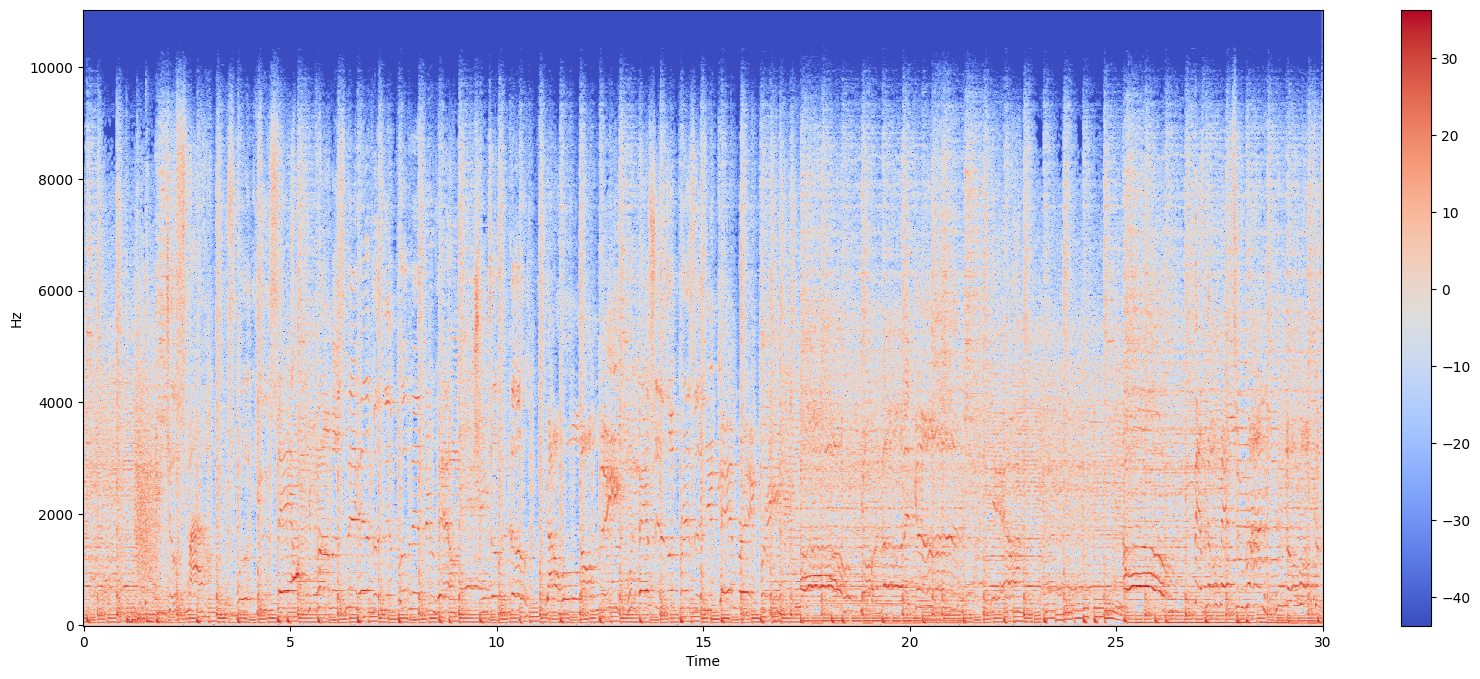

In [5]:
X=librosa.stft(x) #stft -> Short-time Fourier transform
Xdb=librosa.amplitude_to_db(abs(X)) #Genlikten Desibel değerine
plt.figure(figsize=(20,8))
librosa.display.specshow(Xdb,sr=sr,x_axis="time",y_axis="hz")
plt.colorbar()

(20, 1293)


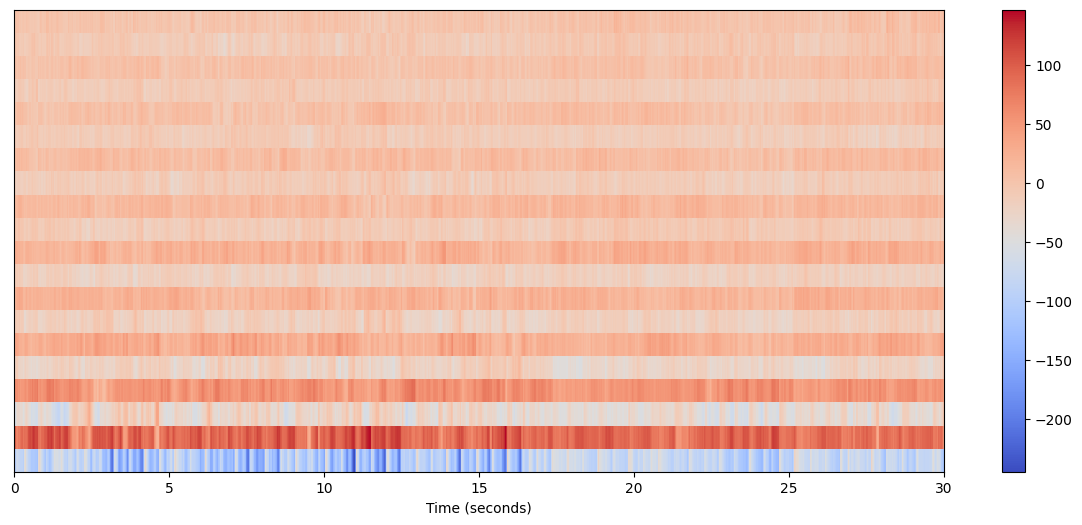

In [8]:
mfkk=librosa.feature.mfcc(y=x,sr=sr)
print(mfkk.shape)
plt.figure(figsize=(15,6))
librosa.display.specshow(mfkk,x_axis="s")
plt.colorbar()

105375


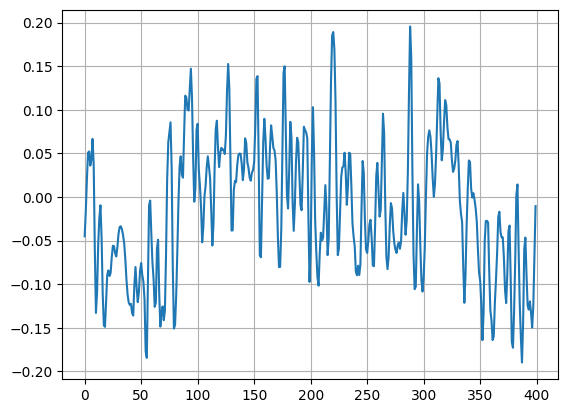

In [29]:
zero_crossing=librosa.zero_crossings(x)
print(sum(zero_crossing)) #Toplam sıfır geçişi sayısı
plt.plot(x[100:500])
plt.grid()

38408


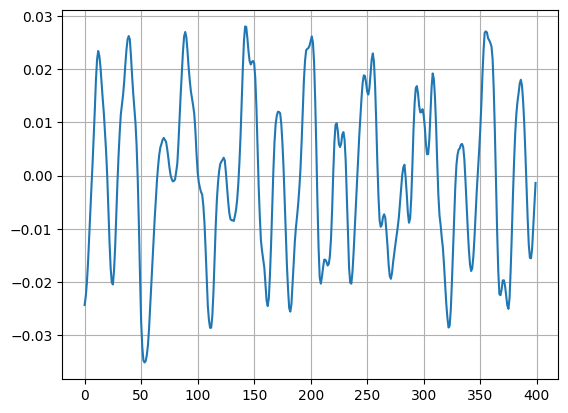

In [28]:
zero_crossing=librosa.zero_crossings(x2)
print(sum(zero_crossing)) #Toplam sıfır geçişi sayısı
plt.plot(x2[100:500])
plt.grid()

(1, 1293)


Text(0, 0.5, 'Hz')

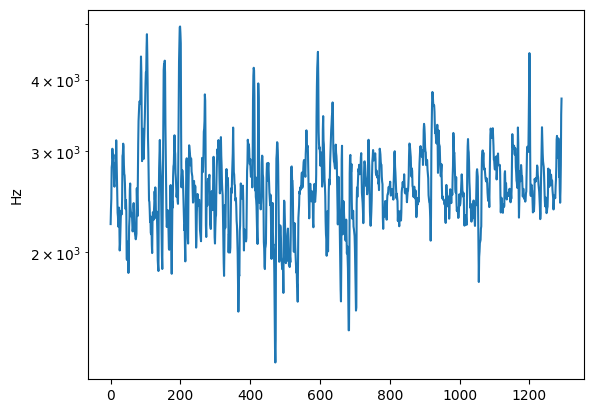

In [23]:
spec_cent=librosa.feature.spectral_centroid(y=x)
print(spec_cent.shape)
plt.semilogy(spec_cent.T)
plt.ylabel("Hz")

(1, 1293)


Text(0, 0.5, 'Hz')

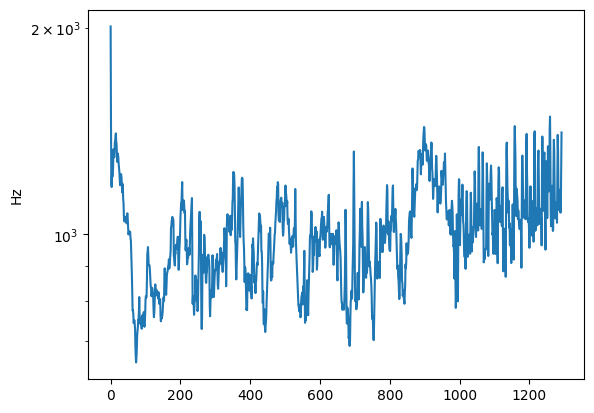

In [24]:
spec_cent=librosa.feature.spectral_centroid(y=x2)
print(spec_cent.shape)
plt.semilogy(spec_cent.T)
plt.ylabel("Hz")


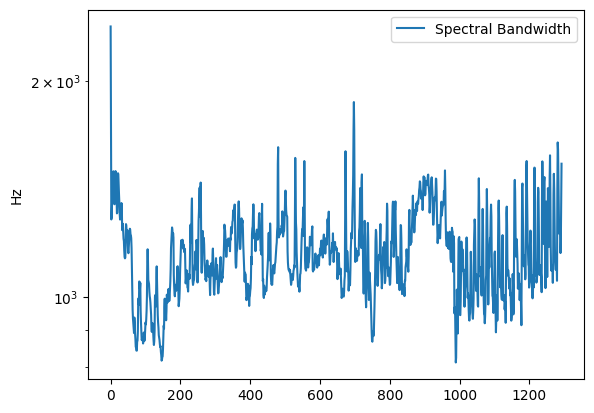

In [56]:
# Spektral merkez frekanslarını Hz cinsinden alın
spec_cent = librosa.feature.spectral_centroid(y=x2)


# Spektral bant genişliği grafiğini çizin (KHz cinsinden)
plt.semilogy(librosa.feature.spectral_bandwidth(y=x2).T, label='Spectral Bandwidth')
plt.ylabel("Hz")

plt.legend()
plt.show()


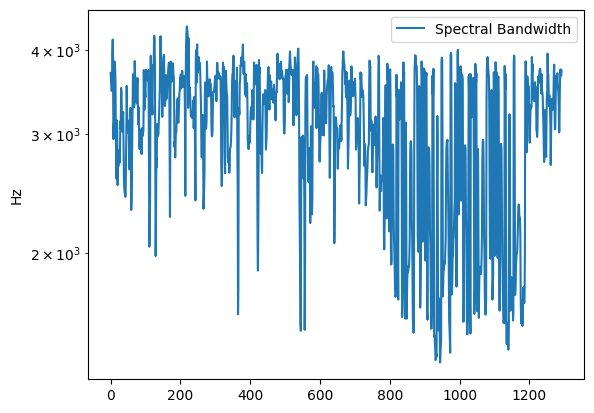

In [55]:
# Spektral merkez frekanslarını Hz cinsinden alın
spec_cent = librosa.feature.spectral_centroid(y=x3)


# Spektral bant genişliği grafiğini çizin (KHz cinsinden)
plt.semilogy(librosa.feature.spectral_bandwidth(y=x3).T, label='Spectral Bandwidth')
plt.ylabel("Hz")

plt.legend()
plt.show()


(1, 1293)


Text(0, 0.5, 'Hz')

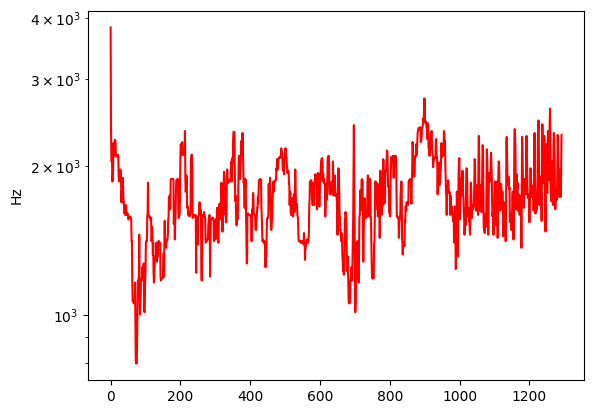

In [44]:
spec_roll=librosa.feature.spectral_rolloff(y=x2,sr=sr)
print(spec_roll.shape)
plt.semilogy(spec_roll.T,"r")
plt.ylabel("Hz")

(1, 1293)


Text(0, 0.5, 'Hz')

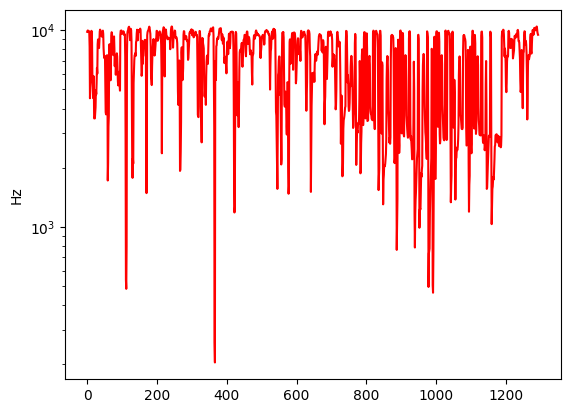

In [48]:
spec_roll=librosa.feature.spectral_rolloff(y=x3,sr=sr)
print(spec_roll.shape)
plt.semilogy(spec_roll.T,"r")
plt.ylabel("Hz")

(12, 1293)


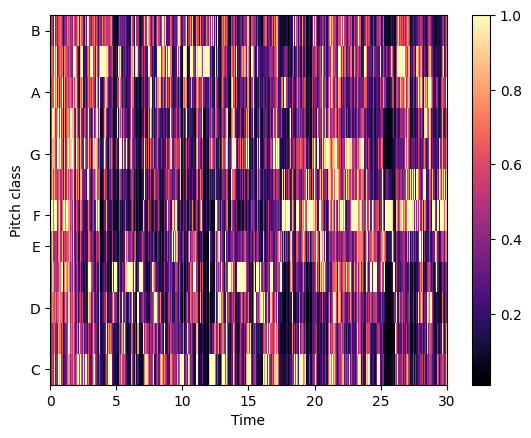

In [15]:
chroma=librosa.feature.chroma_stft(y=x,sr=sr)
print(chroma.shape)
librosa.display.specshow(chroma,y_axis="chroma",x_axis="time")
plt.colorbar()

In [36]:
import pandas as pd

# Veri setini yükleyin (data.csv dosyanızın adını güncelleyin)
data = pd.read_excel("output.xlsx")

# Labellara göre gruplandırın ve her bir özelliğin ortalamasını bulun
grouped_data = data.groupby('label').mean()

# Ekrana yazdırın
print(grouped_data)


             length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
label                                                                        
blues      3.000000          0.342876         0.089885  0.135209  0.002619   
classical  2.999989          0.264632         0.083306  0.042691  0.000406   
country    2.999974          0.345362         0.085315  0.125208  0.001379   
disco      2.999993          0.416642         0.083397  0.135430  0.002730   
hiphop     2.999928          0.455224         0.086832  0.177140  0.006618   
jazz       3.000000          0.297836         0.088080  0.085358  0.001180   
metal      3.000000          0.480486         0.072335  0.152527  0.001083   
pop        3.000000          0.398568         0.087721  0.198465  0.006476   
reggae     3.000000          0.409623         0.089336  0.121716  0.002864   
rock       2.999996          0.387832         0.082602  0.126532  0.001349   

           spectral_centroid_mean  spectral_centroid_var  \
lab

In [58]:
grouped_data["perceptr_mean"]

label
blues       -0.000566
classical   -0.000183
country     -0.000128
disco       -0.000144
hiphop      -0.000500
jazz        -0.000424
metal       -0.000992
pop         -0.000002
reggae      -0.000672
rock        -0.000351
Name: perceptr_mean, dtype: float64

In [40]:
grouped_data.to_excel("deneme.xlsx",index=False)